___

<a href='http://www.pieriandata.com'> <img src='../Pierian_Data_Logo.png' /></a>
___

# Text Classification Assessment
This assessment is very much like the Text Classification Project we just completed, and the dataset is very similar.

The **moviereviews2.tsv** dataset contains the text of 6000 movie reviews. 3000 are positive, 3000 are negative, and the text has been preprocessed as a tab-delimited file. As before, labels are given as `pos` and `neg`.

We've included 20 reviews that contain either `NaN` data, or have strings made up of whitespace.

For more information on this dataset visit http://ai.stanford.edu/~amaas/data/sentiment/

### Task #1: Perform imports and load the dataset into a pandas DataFrame
For this exercise you can load the dataset from `'../TextFiles/moviereviews2.tsv'`.

In [1]:
import numpy as np
import pandas as pd

df = pd.read_csv('../TextFiles/moviereviews2.tsv', sep='\t')
df.head()

,label,review
0,pos,I loved this movie and will watch it again. Or...
1,pos,"A warm, touching movie that has a fantasy-like..."
2,pos,I was not expecting the powerful filmmaking ex...
3,neg,"This so-called ""documentary"" tries to tell tha..."
4,pos,This show has been my escape from reality for ...


### Task #2: Check for missing values:

In [2]:
# Check for NaN values:
df.isnull().sum()

label      0
review    20
dtype: int64

In [4]:
# Check for whitespace strings (it's OK if there aren't any!):

blanks = []  # start with an empty list

for i,lb,rv in df.itertuples():  # iterate over the DataFrame
    if type(rv)==str:            # avoid NaN values
        if rv.isspace():         # test 'review' for whitespace
            blanks.append(i)     # add matching index numbers to the list
        
print(len(blanks), 'blanks: ', blanks)

df.drop(blanks, inplace=True)

0 blanks:  []


### Task #3: Remove NaN values:

In [5]:
df.dropna(inplace=True)

### Task #4: Take a quick look at the `label` column:

In [6]:
df['label']

0       pos
1       pos
2       pos
3       neg
4       pos
       ... 
5995    pos
5996    neg
5997    neg
5998    pos
5999    pos
Name: label, Length: 5980, dtype: object

### Task #5: Split the data into train & test sets:
You may use whatever settings you like. To compare your results to the solution notebook, use `test_size=0.33, random_state=42`

In [7]:
from sklearn.model_selection import train_test_split

X = df['review']
y = df['label']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

### Task #6: Build a pipeline to vectorize the date, then train and fit a model
You may use whatever model you like. To compare your results to the solution notebook, use `LinearSVC`.

In [8]:
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import LinearSVC

# Linear SVC:
text_clf_lsvc = Pipeline([('tfidf', TfidfVectorizer()),
                     ('clf', LinearSVC()),
],verbose=True)

### Task #7: Run predictions and analyze the results

In [9]:
# Form a prediction set
text_clf_lsvc.fit(X_train, y_train)

[Pipeline] ............. (step 1 of 2) Processing tfidf, total=   0.3s
[Pipeline] ............... (step 2 of 2) Processing clf, total=   0.0s


/home/valbuquerque/.local/lib/python3.11/site-packages/sklearn/svm/_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


Pipeline(steps=[('tfidf', TfidfVectorizer()), ('clf', LinearSVC())],
         verbose=True)

In [11]:
# Form a prediction set
predictions = text_clf_lsvc.predict(X_test)

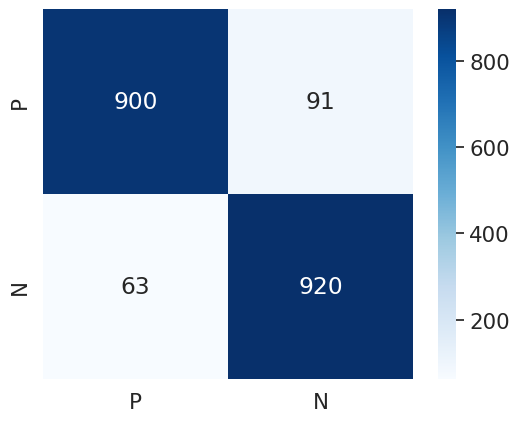

In [25]:
# Report the confusion matrix
import seaborn as sn
import matplotlib.pyplot as plt
from sklearn import metrics

confusion_matrix = (metrics.confusion_matrix(y_test,predictions))

sn.set(font_scale=1.4) # for label size
sn.heatmap(confusion_matrix, xticklabels='PN', yticklabels='PN', annot=True, square=True, cmap='Blues', fmt=".0f") # font size

plt.show()


In [22]:
# Print a classification report
print(metrics.classification_report(y_test,predictions))

              precision    recall  f1-score   support

         neg       0.93      0.91      0.92       991
         pos       0.91      0.94      0.92       983

    accuracy                           0.92      1974
   macro avg       0.92      0.92      0.92      1974
weighted avg       0.92      0.92      0.92      1974



In [23]:
# Print the overall accuracy
print(metrics.accuracy_score(y_test,predictions))

0.9219858156028369


## Great job!